In [1]:
import sys
import skvideo.io
import skvideo.datasets

/home/misha/tensorflow/lib/python3.5/site-packages/skvideo/__init__.py:356: UserWarning: avconv/avprobe not found in path: 
  warnings.warn("avconv/avprobe not found in path: " + str(path), UserWarning)


In [2]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution3D, MaxPooling3D

Using TensorFlow backend.


In [3]:
from keras.optimizers import SGD, RMSprop, Nadam
from keras.utils import np_utils, generic_utils

In [4]:
import tensorflow as tf
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import cv2
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation
from sklearn import preprocessing

/home/misha/tensorflow/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
print(sess.run(hello))

b'Hello, TensorFlow!'


### Image specification + Random

In [6]:
img_rows,img_cols,img_depth=120,160,15
r_state = 42
np.random.seed(r_state)
tf.set_random_seed(r_state)

### Training data

In [7]:
train_nb, test_nb = 196, 100
x_train = np.zeros((0,img_rows,img_cols,img_depth))# variable to store entire dataset
x_test = np.zeros((0,img_rows,img_cols,img_depth))
print(x_train.shape, x_test.shape)

(0, 120, 160, 15) (0, 120, 160, 15)


In [8]:
print(x_test)

[]


In [16]:
def readFrames(vdata,start,end,width,step): # width of the window and step
    x_arr = np.zeros((0,img_rows,img_cols,img_depth))
    
    frame_number = 0
    
    uniq_frames_nb = end - start  # + width - (end - start) % width
    
    uniq_frames_nb = uniq_frames_nb - (uniq_frames_nb - width) % step
    
    print('uniq frames: ', uniq_frames_nb)
    frames = []

    for frame in vdata:

        if (frame_number >= start and frame_number < start + uniq_frames_nb):
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            res_img = cv2.resize(frame, (img_cols, img_rows), interpolation=cv2.INTER_AREA)
            frames.append(res_img)
#             print(frame_number, res_img)
        if frame_number > start + uniq_frames_nb:
            frame_number = 0
            break
        frame_number += 1
        
    # sliding window itself
#     print(frames)
    nb_x = (uniq_frames_nb - width) / step + 1
    print('adding',nb_x,'windows')
    for i in range(int(nb_x)):
        fr_arr = np.zeros((img_depth,img_rows,img_cols))
        for j in range(img_depth):
            fr_arr[j] = frames[i * step + j]
        fr_arr = np.rollaxis(fr_arr,0,3)
        fr_arr = np.expand_dims(fr_arr, axis = 0)
        x_arr = np.concatenate((x_arr, fr_arr), axis=0) 
        
    return x_arr

In [ ]:
# filename = '/home/misha/Documents/Thesis/Dataset/BNG_white_1'
# videodata = skvideo.io.vreader(filename + '.mov')
# vid_arr = np.zeros((4,img_rows,img_cols,img_depth))

# readFrames(vid_arr,0,videodata,360,375,img_depth,5)

# # print(vid_arr)




In [ ]:
# visualizing the array
# print(vid_arr[3].shape)
# vid_to_viz = vid_arr.copy()
# vid_to_viz = np.rollaxis(vid_to_viz[3], 2, 0)
# print(vid_to_viz.shape)

# vid_to_viz = x_train[100].copy()
# print(vid_to_viz.shape)
# vid_to_viz = np.rollaxis(vid_to_viz, 3, 0)
# print(vid_to_viz.shape)
# vid_to_viz = np.rollaxis(vid_to_viz[0], 2, 0)
# print(vid_to_viz.shape)

# _, axes = plt.subplots(ncols=img_depth,figsize=(20,5))
# for i in range(img_depth):
#     axes[i].imshow(vid_to_viz[i],cmap = 'gray')
                   
# plt.show()

In [101]:
print(x_train.shape)

(196, 120, 160, 15)


In [22]:
print(np.array_equal(x_train_0[1],x_train_0[3]))

False


In [60]:
print(x_train.shape)

(98, 120, 160, 15)


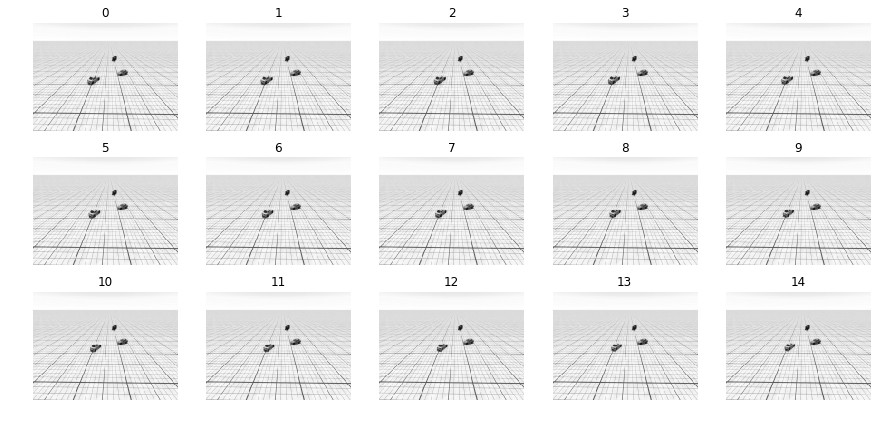

In [59]:
vid_to_viz = x_train[1]
# vid_to_viz = np.flip(np.squeeze(X_val_new[5], axis=3),1)
vid_to_viz = np.rollaxis(vid_to_viz, 2, 0)
_, axes = plt.subplots(ncols=5,nrows=3,figsize=(15,7))
for i in range(3):
    for j in range(5):
        axes[i][j].axis('off')
        axes[i][j].set_title(i * 5 + j)
        axes[i][j].imshow(vid_to_viz[i * 5 + j],cmap = 'gray')
                   
plt.show()

In [13]:
vid_to_viz = x_train_0[3]
# vid_to_viz = np.flip(np.squeeze(X_val_new[5], axis=3),1)
vid_to_viz = np.rollaxis(vid_to_viz, 2, 0)
_, axes = plt.subplots(ncols=5,nrows=3,figsize=(15,7))
for i in range(3):
    for j in range(5):
        axes[i][j].axis('off')
        axes[i][j].set_title(i * 5 + j)
        axes[i][j].imshow(vid_to_viz[i * 5 + j],cmap = 'gray')
                   
plt.show()

IndexError: index 3 is out of bounds for axis 0 with size 0

In [61]:
x_train = np.zeros((0,img_rows,img_cols,img_depth))

In [18]:
filename = '/home/misha/Documents/Thesis/Dataset/BNG_white_1'
videodata = skvideo.io.vreader(filename + '.mov')


x_train = readFrames(videodata,400,425,img_depth,5) # 400,680
print(x_train.shape)

uniq frames:  25
adding 3.0 windows
(3, 120, 160, 15)


In [63]:
img = videodata[1]
plt.plot(img)
plt.show()

TypeError: 'generator' object is not subscriptable

In [64]:
filename = '/home/misha/Documents/Thesis/Dataset/BNG_white_1'
videodata = skvideo.io.vreader(filename + '.mov')
x_train = np.concatenate((x_train_0,readFrames(videodata,6150,6360,img_depth,5)), axis = 0)
print(x_train.shape)

uniq frames:  225
adding 43.0 windows
(98, 120, 160, 15)


In [65]:
# class 1
filename = '/home/misha/Documents/Thesis/Dataset/BNG_white_1'
videodata = skvideo.io.vreader(filename + '.mov')

x_train = np.concatenate((x_train,readFrames(videodata,3480,3610,img_depth,5)), axis = 0)
print(x_train.shape)

uniq frames:  135
adding 25.0 windows
(123, 120, 160, 15)


In [66]:
x_train = np.concatenate((x_train,readFrames(videodata,3760,3800,img_depth,5)), axis = 0)
print(x_train.shape)

uniq frames:  45
adding 7.0 windows
(130, 120, 160, 15)


In [67]:
filename = '/home/misha/Documents/Thesis/Dataset/BNG_white_1'
videodata = skvideo.io.vreader(filename + '.mov')
x_train = np.concatenate((x_train,readFrames(videodata,3980,4080,img_depth,5)), axis = 0)
print(x_train.shape)

uniq frames:  105
adding 19.0 windows
(149, 120, 160, 15)


In [68]:
filename = '/home/misha/Documents/Thesis/Dataset/BNG_white_1'
videodata = skvideo.io.vreader(filename + '.mov')
x_train = np.concatenate((x_train,readFrames(videodata,4380,4550,img_depth,5)), axis = 0)
print(x_train.shape)

uniq frames:  180
adding 34.0 windows
(183, 120, 160, 15)


In [69]:
filename = '/home/misha/Documents/Thesis/Dataset/BNG_white_1'
videodata = skvideo.io.vreader(filename + '.mov')
x_train = np.concatenate((x_train,readFrames(videodata,6410,6480,img_depth,5)), axis = 0)
print(x_train.shape)

uniq frames:  75
adding 13.0 windows
(196, 120, 160, 15)


### Open files

In [ ]:
x_test = 

In [45]:
filename = '/home/misha/Documents/Thesis/Dataset/race_night'
videodata = skvideo.io.vreader(filename + '.mov')
x_test = readFrames(videodata,563,663,img_depth,10)

uniq frames:  105
adding 10.0 windows


In [46]:
x_test = np.concatenate((x_test,readFrames(videodata,1600,1700,img_depth,10)), axis = 0)

uniq frames:  105
adding 10.0 windows


In [47]:
x_test = np.concatenate((x_test,readFrames(videodata,950,1050,img_depth,10)), axis = 0)

uniq frames:  105
adding 10.0 windows


In [52]:
filename = '/home/misha/Documents/Thesis/Dataset/race_night'
videodata = skvideo.io.vreader(filename + '.mov')
x_test = np.concatenate((x_test,readFrames(videodata,3760,3860,img_depth,10)), axis = 0)

uniq frames:  105
adding 10.0 windows


In [53]:
x_test.shape

(40, 120, 160, 15)

In [55]:
y_test = np.ones((x_test.shape[0],),dtype=int)
y_test[0:20] = 0
y_test[20:] = 1
print(y_test.shape)

(40,)


In [56]:
y_test = np_utils.to_categorical(y_test, nb_classes)
print(y_test.shape)

(40, 2)


In [57]:
x_test = np.expand_dims(x_test, axis=4)
print(x_test.shape)

(40, 120, 160, 15, 1)


In [58]:
from sklearn.utils import shuffle
x_test, y_test = shuffle(x_test,y_test, random_state = r_state)

### Reading accident class training

##### Image resize

### Reading all frames classes (takes long time)

### CNN Training parameters

In [17]:
print(x_train.shape)

(0, 120, 160, 15)


In [ ]:

x_train = np.expand_dims(x_train, axis=4)
print(x_train.shape)

##### Assign label to each class

In [70]:
y_train = np.ones((x_train.shape[0],),dtype=int)
y_train[0:98] = 0
y_train[98:] = 1
print(y_train.shape)

(196,)


##### CNN training parameters

In [91]:
batch_size = 8
nb_classes = 2 
nb_epoch = 5


##### convert class vectors to binary class matrices

In [71]:
y_train = np_utils.to_categorical(y_train, nb_classes)
print(y_train.shape)

(196, 2)


In [73]:
# shuffle train data
x_train, y_train = shuffle(x_train,y_train, random_state = r_state)
x_train = np.expand_dims(x_train, axis=4)
print(x_train.shape)

(196, 120, 160, 15, 1)


##### number of convolutional filters to use at each layer

In [74]:
nb_filters = [32, 32]

##### level of pooling to perform at each layer (POOL x POOL)

In [75]:
nb_pool = [2, 2]

##### Level of convolution to perform at each layer (CONV x CONV)

In [76]:
nb_conv = [3,3]

### Pre-processing

In [77]:
x_train = x_train.astype('float32')

# train_set -= np.mean(train_set)

x_train /=np.max(x_train)

In [ ]:
print(img_rows, img_cols, img_depth)

In [78]:
x_test = x_test.astype('float32')
x_test /= np.max(x_test)

### Define model

In [79]:
model = Sequential()
model.add(Convolution3D(16, (4, 4, 1),
input_shape=(img_rows, img_cols, img_depth, 1), activation='relu'))

# model.add(Convolution3D(16, (3, 3, 2), activation='relu'))

model.add(MaxPooling3D(pool_size=(nb_pool[0], nb_pool[0], nb_pool[0])))
model.add(Dropout(0.2))

model.add(Convolution3D(32, (4, 4, 4), activation='relu'))

model.add(MaxPooling3D(pool_size=(2, 2, 2)))
model.add(Dropout(0.2))

model.add(Convolution3D(64, (3, 3, 2), activation='relu'))
model.add(Dropout(0.2))

# model.add(Convolution3D(128, (1, 1, 1), activation='relu'))

model.add(MaxPooling3D(pool_size=(2, 2, 1)))

model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, init='normal', activation='relu'))
model.add(Dense(256, init='normal', activation='relu'))

model.add(Dropout(0.2))

model.add(Dense(nb_classes,init='normal'))

model.add(Activation('softmax'))

# model.optimizer.lr.assign(0.1)

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Nadam(lr=0.001))


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(128, activation="relu", kernel_initializer="normal")`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, activation="relu", kernel_initializer="normal")`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:31: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(2, kernel_initializer="normal")`


In [80]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_1 (Conv3D)            (None, 117, 157, 15, 16)  272       
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 58, 78, 7, 16)     0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 58, 78, 7, 16)     0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 55, 75, 4, 32)     32800     
_________________________________________________________________
max_pooling3d_2 (MaxPooling3 (None, 27, 37, 2, 32)     0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 27, 37, 2, 32)     0         
_________________________________________________________________
conv3d_3 (Conv3D)            (None, 25, 35, 1, 64)     36928     
__________

In [90]:
x_train = np.flip(x_train, 2)

In [116]:
# Split the data
X_train_new, X_val_new, y_train_new,y_val_new =  train_test_split(x_train, y_train, test_size=0.2, random_state=r_state)

In [118]:
X_train_new = np.expand_dims(X_train_new, axis=4)
print(X_train_new.shape)

X_val_new = np.expand_dims(X_val_new, axis=4)
print(X_val_new.shape)

(156, 120, 160, 15, 1)
(40, 120, 160, 15, 1)


#### Training

In [92]:
hist = model.fit(x_train, y_train, validation_data=(x_test,y_test),
          batch_size=batch_size, epochs=nb_epoch, shuffle=True)

Train on 196 samples, validate on 40 samples
Epoch 1/5
196/196 [==============================] - 3s - loss: 0.5758 - acc: 0.9643 - val_loss: 4.0889 - val_acc: 0.5000
Epoch 2/5
196/196 [==============================] - 2s - loss: 0.5757 - acc: 0.9643 - val_loss: 4.3529 - val_acc: 0.5000
Epoch 3/5
196/196 [==============================] - 2s - loss: 0.5757 - acc: 0.9643 - val_loss: 4.8139 - val_acc: 0.5000
Epoch 4/5
196/196 [==============================] - 2s - loss: 0.5757 - acc: 0.9643 - val_loss: 4.9891 - val_acc: 0.5000
Epoch 5/5
196/196 [==============================] - 2s - loss: 0.5757 - acc: 0.9643 - val_loss: 5.2983 - val_acc: 0.5000


### Split the data

### Train the model

### Evaluate the model

In [134]:
X_val_new = np.flip(X_val_new, 2)

In [ ]:
X_val_new = np.

In [94]:
score = model.evaluate(x_test, y_test, batch_size=batch_size)
print('Test score:', score[0])
print('Test accuracy:', score[1]) 


32/40 [=======================>......] - ETA: 0sTest score: 5.29828157425
Test accuracy: 0.5


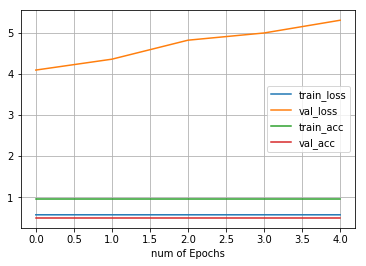

In [93]:
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']

plt.plot(train_loss)
plt.plot(val_loss)
plt.plot(train_acc)
plt.plot(val_acc)
plt.xlabel('num of Epochs')
plt.grid(True)
plt.legend(['train_loss','val_loss','train_acc', 'val_acc'])

plt.show()

### Plots the result

In [ ]:
# train_loss=hist.history['loss']
# val_loss=hist.history['val_loss']
# train_acc=hist.history['acc']
# val_acc=hist.history['val_acc']
# xc=range(10)

# plt.figure(1,figsize=(7,5))
# plt.plot(xc,train_loss)
# plt.plot(xc,val_loss)
# plt.xlabel('num of Epochs')
# plt.ylabel('loss')
# plt.title('train_loss vs val_loss')
# plt.grid(True)
# plt.legend(['train','val'])
# print(plt.style.available) # use bmh, classic,ggplot for big pictures
# plt.style.use(['classic'])

# plt.figure(2,figsize=(7,5))
# plt.plot(xc,train_acc)
# plt.plot(xc,val_acc)
# plt.xlabel('num of Epochs')
# plt.ylabel('accuracy')
# plt.title('train_acc vs val_acc')
# plt.grid(True)
# plt.legend(['train','val'],loc=4)
# #print plt.style.available # use bmh, classic,ggplot for big pictures
# plt.style.use(['classic'])